In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
url = 'https://www.w3schools.com/python/pandas/data.csv'
df = pd.read_csv(url)
print(df.head())
print(df.isnull().sum())
df.dropna(inplace=True)


   Duration  Pulse  Maxpulse  Calories
0        60    110       130     409.1
1        60    117       145     479.0
2        60    103       135     340.0
3        45    109       175     282.4
4        45    117       148     406.0
Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64


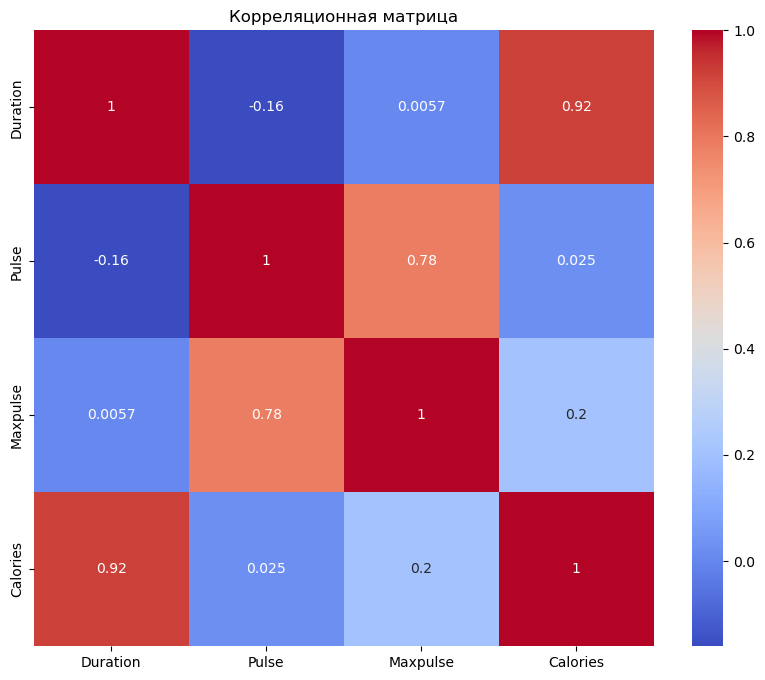

In [3]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

Duration и Calories сильно положительно коррелируют (0.92), что означает рост сожжённых калорий с увеличением времени тренировки. Pulse и Maxpulse также связаны положительно (0.78), что отражает зависимость максимального пульса от среднего. Остальные взаимосвязи слабые.

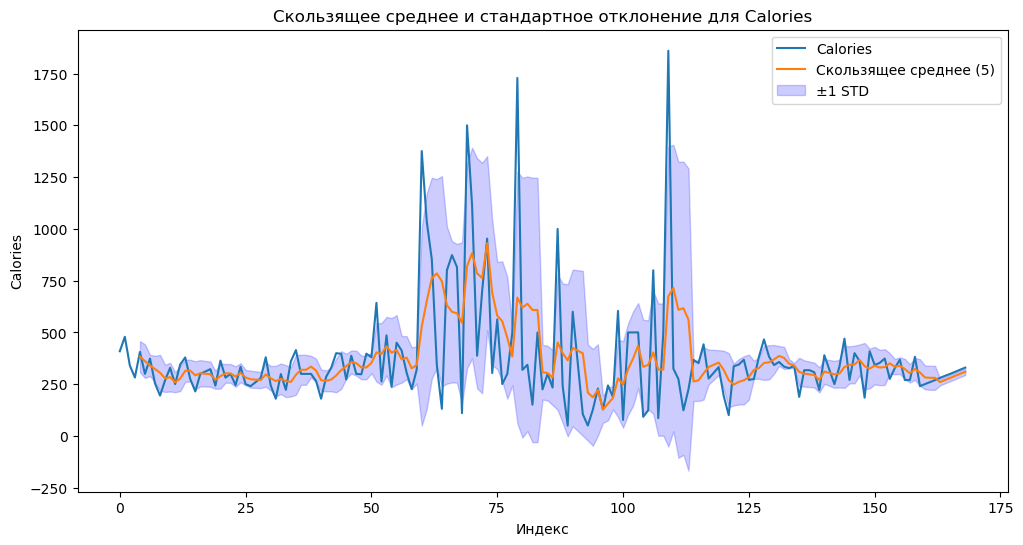

In [6]:
df['Calories_MA'] = df['Calories'].rolling(window=5).mean()
df['Calories_STD'] = df['Calories'].rolling(window=5).std()
plt.figure(figsize=(12, 6))
plt.plot(df['Calories'], label='Calories')
plt.plot(df['Calories_MA'], label='Скользящее среднее (5)')
plt.fill_between(df.index, df['Calories_MA'] - df['Calories_STD'], df['Calories_MA'] + df['Calories_STD'], color='b', alpha=0.2, label='±1 STD')
plt.legend()
plt.title('Скользящее среднее и стандартное отклонение для Calories')
plt.xlabel('Индекс')
plt.ylabel('Calories')
plt.show()


Скользящее среднее показывает общее сглаженное поведение сожжённых калорий, убирая резкие колебания. В центре диапазона (примерно от 50 до 100 индекса) наблюдаются заметные всплески как в среднем значении, так и в стандартном отклонении, что говорит о сильной вариативности энергозатрат в этот период. В начале и конце графика колебания минимальны, значения стабильны.

In [11]:
median_pulse = df['Pulse'].median()
group_low = df[df['Pulse'] <= median_pulse]['Calories']
group_high = df[df['Pulse'] > median_pulse]['Calories']
print("Проверка нормальности распределения:")
print("Группа с низким Pulse:", stats.shapiro(group_low))
print("Группа с высоким Pulse:", stats.shapiro(group_high))
print("Проверка равенства дисперсий:", stats.levene(group_low, group_high))
t_stat, p_value = stats.ttest_ind(group_low, group_high, equal_var=False)
print(f"t-статистика: {t_stat:.4f}, p-значение: {p_value:.4f}")
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние значения различаются.")
else:
    print("Не отвергаем нулевую гипотезу: средние значения не различаются.")


Проверка нормальности распределения:
Группа с низким Pulse: ShapiroResult(statistic=0.7309355966637863, pvalue=5.866714891127559e-11)
Группа с высоким Pulse: ShapiroResult(statistic=0.578356348913663, pvalue=5.4973432828354335e-14)
Проверка равенства дисперсий: LeveneResult(statistic=0.24842288698688417, pvalue=0.6188637904523133)
t-статистика: -0.9609, p-значение: 0.3381
Не отвергаем нулевую гипотезу: средние значения не различаются.


Проведённая проверка показала, что средние значения сожжённых калорий в группах с низким и высоким пульсом не различаются статистически значимо (p-value = 0.3381 > 0.05). Нулевая гипотеза о равенстве средних значений не отвергается.
Распределения в обеих группах не являются нормальными, но тест Левена подтвердил равенство дисперсий.